In [1]:
from sklearn.naive_bayes import GaussianNB

In [2]:
gnb = GaussianNB()

In [3]:
from sklearn.datasets import make_classification

In [4]:
import matplotlib.pyplot as plt

In [5]:
X,Y = make_classification(n_samples = 200,n_features =2,n_informative=2,n_redundant=0,random_state=5)

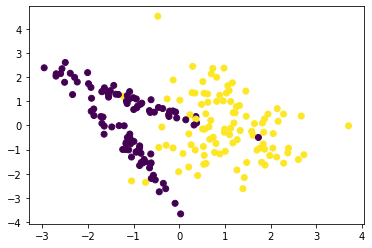

In [6]:
plt.scatter(X[:,0],X[:,1],c=Y)
plt.show()

In [7]:
print(X[0])
print(X.shape)

[-2.29208426  1.98909368]
(200, 2)


In [8]:
# Train our classifier
gnb.fit(X,Y)

GaussianNB()

In [9]:
gnb.score(X,Y)

0.915

In [10]:
ypred = gnb.predict(X)
print(ypred)

[0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 1 0 1 0 1 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0
 1 0 0 1 0 1 0 1 1 1 0 1 1 1 1 0 1 1 1 0 0 0 1 0 1 0 1 1 0 0 1 0 0 1 0 0 1
 1 0 0 0 1 0 1 1 1 1 1 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0
 1 0 0 0 1 0 0 1 1 1 1 1 1 0 0 1 1 0 0 0 1 0 0 0 1 0 0 1 1 1 1 1 1 0 1 1 0
 1 1 0 0 1 0 0 0 0 0 1 1 0 1 0 1 0 1 0 0 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 0 0
 1 0 1 1 1 0 1 0 0 1 0 0 1 1 1]


In [11]:
print(Y)

[0 0 0 1 1 0 1 0 0 1 1 0 0 0 0 1 1 0 1 0 1 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0
 1 0 0 1 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1 0 0 1 0 1 0 1 1 0 0 1 0 0 1 0 0 1
 1 0 0 0 1 0 1 1 1 1 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 0
 1 0 0 0 1 1 0 1 1 1 1 0 1 0 0 1 1 0 0 0 1 0 0 0 1 0 0 1 1 1 1 1 1 0 1 1 0
 1 0 0 0 1 0 0 0 1 0 1 1 1 1 0 1 0 1 0 0 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1
 1 0 1 0 1 0 1 1 0 1 0 0 1 1 1]


In [12]:
import numpy as np
acc = (np.sum(ypred==Y))/X.shape[0]
print(acc)

0.915


### Generate Confusion Matrix

In [13]:
from sklearn.metrics import confusion_matrix

In [14]:
cnf_matrix = confusion_matrix(Y,ypred)
print(cnf_matrix)

[[93  7]
 [10 90]]


### Visualise Confusion Matrix

In [15]:
import itertools

"""Use this method directly"""
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion Matrix',
                          cmap=plt.cm.copper):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.rcParams['axes.grid'] = False
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="black" if cm[i, j] > thresh else "white")

    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')

Confusion matrix without normalization
[[93  7]
 [10 90]]


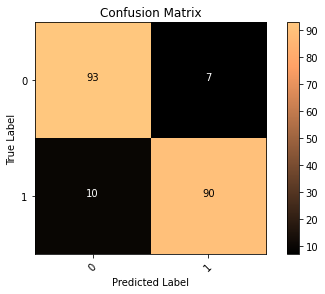

In [16]:
plot_confusion_matrix(cnf_matrix, [0,1], normalize=False)